<t4> Le but ici est de savoir automatiquement quels sont les articles les plus recherchés et les plus en vogue d'une catégorie donnée sur AliExpression en vu d'éyablir une stratégie de Dropshipping. Par exemple, on va taper "méditation" dans la barre de recherche. On copie colle l'url de cette recherche dans ligne de code puis on execute toutesles cellules.

In [ ]:
import pandas as pd
import numpy as np
import requests
import pprint
from requests_html import AsyncHTMLSession
import asyncio
import pickle



<h3> Extraction de tous les liens de la pages internet choisie

In [ ]:
# On prendra pour exemple les articles affichés quand on tape Méditation

In [3]:
async def get_all_url():
    links = []
    page = 1
    
    while True:
        print(f'fetching page {page}')
        url = f'https://www.aliexpress.com/wholesale?trafficChannel=main&d=y&CatId=0&SearchText=meditation&ltype=wholesale&SortType=default&page={page}'
        r = await asession.get(url)
        await r.html.arender()
        
        for i in list(r.html.absolute_links):
            if 'item' in i:
                links.append(i)
                
        page += 1
    return links

In [ ]:
'''On sauvegarde les liens scrapés'''
# with open ('links.pckl', 'wb') as f:
#     pickle.dump(links, f)


'''On charge les liens scrapés'''
f = open('links.pckl', 'rb')
links = pickle.load(f)
f.close()

In [7]:
asession = AsyncHTMLSession()
async def extract_infos():

    ratings = []
    reviews = []
    solds = []
    liens = []
    
    for number, link in enumerate(links):
        try :
            print(f'iteration {number} sur {len(links)}')
            
            r = await asession.get(link)
            await r.html.arender()
            
            liens.append(link)
            

            rating = r.html.find('.overview-rating-average')
            rating = rating[0].text
            print('rating :', rating)
            ratings.append(rating)

            review = r.html.find('.product-reviewer-reviews')
            review = review[0].text
            review = review.replace(' Reviews','')
            print('review :', review)
            reviews.append(review)

            sold = r.html.find('.product-reviewer-sold')
            sold = sold[0].text
            sold = sold.replace(' orders', '')
            print('sold :', sold)
            solds.append(sold)
            
#        Sauvegarde des infos pendant la boucle au cas ou si le code crash car beaucoup de liens :

            f = open('info_extract.pckl', 'wb')
            pickle.dump([links, titles, ratings, reviews, solds], f)
            f.close()
            
            await asyncio.sleep(1)
                
        except Exception as e:
            print(e)
            print(f'numero {number} n\'est pas passé')
            print('\n')
            pass
    return links, ratings, reviews, solds
    

In [ ]:
await extract_infos()

In [2]:
with open('info_extract.pckl', 'rb') as f:
    df = pickle.load(f)
df = pd.DataFrame(df).T
df

,0,1,2,3,4
0,https://www.aliexpress.com/item/10050026324534...,Natural Tower Incense Sandalwood Air Purifying...,4.8,330,773
1,https://www.aliexpress.com/item/4000539195739....,Prayer Beads Bracelet 108 Tibetan Buddhist Ros...,4.4,23,340
2,https://www.aliexpress.com/item/10050025165308...,45Pcs/bag Backflow Incense Cones Natural Sanda...,4.7,2097,3329
3,https://www.aliexpress.com/item/10050026324534...,Natural Tower Incense Sandalwood Air Purifying...,4.8,5,177
4,https://www.aliexpress.com/item/4000370549643....,1 Box Tulip Flavors Tibetan Incense Sticks Ind...,4.8,330,773
...,...,...,...,...,...
913,https://www.aliexpress.com/item/10050026619271...,None,None,None,None
914,https://www.aliexpress.com/sitemap.html,None,None,None,None
915,https://www.aliexpress.com/item/10050024777971...,None,None,None,None
916,https://www.aliexpress.com/item/10050021238781...,None,None,None,None


<h3> Nettoyage du dataset récolté

In [3]:
df.columns =['links', 'title','rating', 'reviews', 'orders']
df

,links,title,rating,reviews,orders
0,https://www.aliexpress.com/item/10050026324534...,Natural Tower Incense Sandalwood Air Purifying...,4.8,330,773
1,https://www.aliexpress.com/item/4000539195739....,Prayer Beads Bracelet 108 Tibetan Buddhist Ros...,4.4,23,340
2,https://www.aliexpress.com/item/10050025165308...,45Pcs/bag Backflow Incense Cones Natural Sanda...,4.7,2097,3329
3,https://www.aliexpress.com/item/10050026324534...,Natural Tower Incense Sandalwood Air Purifying...,4.8,5,177
4,https://www.aliexpress.com/item/4000370549643....,1 Box Tulip Flavors Tibetan Incense Sticks Ind...,4.8,330,773
...,...,...,...,...,...
913,https://www.aliexpress.com/item/10050026619271...,None,None,None,None
914,https://www.aliexpress.com/sitemap.html,None,None,None,None
915,https://www.aliexpress.com/item/10050024777971...,None,None,None,None
916,https://www.aliexpress.com/item/10050021238781...,None,None,None,None


In [4]:
df.duplicated().sum()

6

In [5]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [21]:
df.dropna(how='any', inplace = True)
df.isna().sum()

links      0
title      0
rating     0
reviews    0
orders     0
dtype: int64

In [22]:
# supression des valeurs '1 review'et '1 order'

df = df[~(df.reviews=='1 Review')& ~(df.orders=='1 order') ]


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [8]:
# supression des liens identiques
df = df[~df['links'].duplicated()]


In [9]:
df.reset_index(inplace=True)
df.drop('index', axis =1, inplace= True)
len(df)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


505

In [10]:
# suppression des lignes lorsque le review et le order sont les mêmes.
# Il y a une forte probabilité que ce soit les mêmes produits

for i in range(len(df)-1):
    if df['reviews'][i] == df['reviews'][i+1] and df['orders'][i]==df['orders'][i+1]:
        df.drop(index = i, inplace = True)
    
len(df)

433

In [11]:
df.rating = pd.to_numeric(df['rating'])
df.reviews = pd.to_numeric(df['reviews'])
df.orders = pd.to_numeric(df['orders'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433 entries, 0 to 504
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   links    433 non-null    object 
 1   title    433 non-null    object 
 2   rating   433 non-null    float64
 3   reviews  433 non-null    int64  
 4   orders   433 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 40.3+ KB


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
# Tri et sauvegarde du fichier en csv
df = df.sort_values(by=['orders', 'reviews', 'rating'], ascending=False)
df.reset_index(inplace=True)
df.drop('index', axis =1, inplace= True)

df.to_csv(r'/Users/utilisateur/Desktop/Dropshipping_aliExpress.csv', index = False, header=True)


In [13]:
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt
import re


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


<h3> Et voici les meilleurs articles de la catégorie choisie :

In [14]:
df = df.head(20)

In [15]:
async def afficher_image(url):
    
    r = await asession.get(url)
    await r.html.arender()

    lien = r.html.find('.magnifier-image')
    lien = re.findall(r'(https?://\S+)', str(lien))
    lien = lien[0]
#     print(lien)
    
    response = requests.get(lien, stream=True)
    img = Image.open(response.raw)

    plt.imshow(img)
    plt.axis('off');
    

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


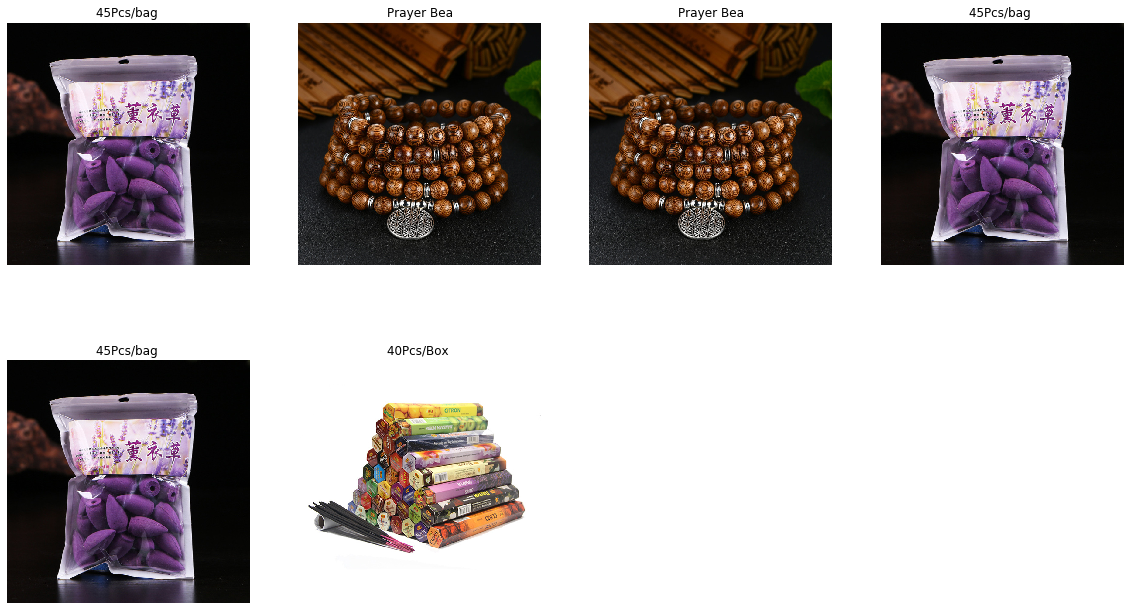

In [18]:
asession = AsyncHTMLSession()
plt.figure(figsize = (20,30))
n=1
for i in range(len(df)):
    try :
        url = df.links[i]
        plt.subplot(5,4,n)
        plt.title(df.title[i][:10])
        await afficher_image(url)
        n=n+1
        
    except :
        pass


In [20]:
df.links

2      https://www.aliexpress.com/item/10050025165308...
6      https://www.aliexpress.com/item/4000539195739....
15     https://www.aliexpress.com/item/10050025165308...
28     https://www.aliexpress.com/item/10050024528546...
30     https://www.aliexpress.com/item/4000744859743....
33     https://www.aliexpress.com/item/10050027199426...
12     https://www.aliexpress.com/item/10050020290395...
14     https://www.aliexpress.com/item/4001293159297....
18     https://www.aliexpress.com/item/4000370549643....
24     https://www.aliexpress.com/item/10050024528546...
36     https://www.aliexpress.com/item/10050019191990...
7      https://www.aliexpress.com/item/4000539195739....
10     https://www.aliexpress.com/item/10050025165308...
16     https://www.aliexpress.com/item/4001293159297....
0      https://www.aliexpress.com/item/10050026324534...
5      https://www.aliexpress.com/item/10050026869914...
50     https://www.aliexpress.com/item/10050022115516...
66     https://www.aliexpress.c